In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("01-Petrol_consumption.csv")

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [7]:
df.isnull().sum()#Checking for total null values

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [8]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [10]:
df.corr()['Petrol_Consumption']

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
Name: Petrol_Consumption, dtype: float64

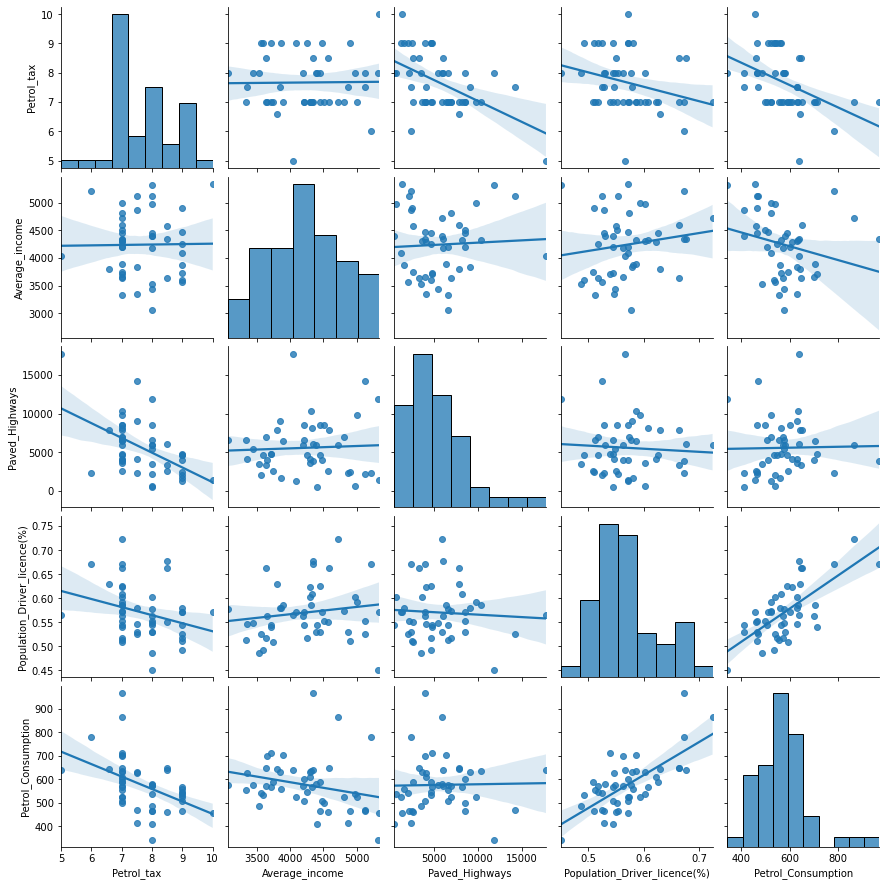

In [11]:
import seaborn as sns
sns.pairplot(df,kind="reg")

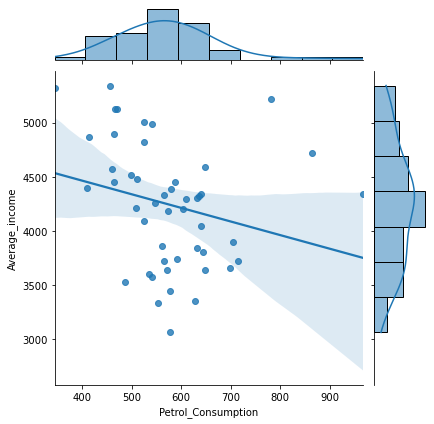

In [14]:
sns.jointplot(x="Petrol_Consumption",y="Average_income",data=df,kind="reg")

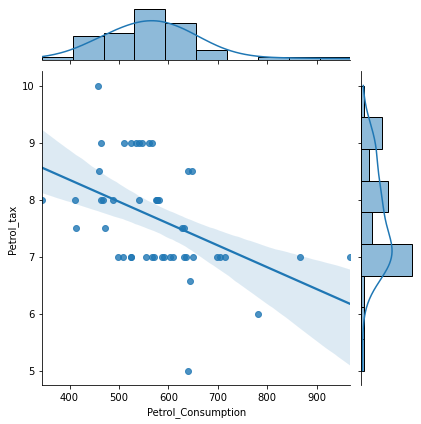

In [15]:
sns.jointplot(x="Petrol_Consumption",y="Petrol_tax",data=df,kind="reg")

In [18]:
## Linear Regression alternative 1
import statsmodels.api as sm
X=df[["Petrol_tax"]]
X[0:5]
X=sm.add_constant(X)
X[0:5]
y=df["Petrol_Consumption"]
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     11.76
Date:                Wed, 17 Feb 2021   Prob (F-statistic):            0.00128
Time:                        20:17:31   Log-Likelihood:                -288.58
No. Observations:                  48   AIC:                             581.2
Df Residuals:                      46   BIC:                             584.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        984.0076    119.624      8.226      0.000     743.218    1224.797
Petrol_tax   -53.1063     15.484     -3.430      0.001     -84.273     -21.939
==============================================================================
Omnibus:                       13.679   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.100
Skew:                           0.899   Prob(JB):                     7.12e-05
Kurtosis:                       5.514   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
## Linear regression alternative 2
import statsmodels.formula.api as smf
lm=smf.ols("Petrol_Consumption ~ Petrol_tax",df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     11.76
Date:                Wed, 17 Feb 2021   Prob (F-statistic):            0.00128
Time:                        20:19:16   Log-Likelihood:                -288.58
No. Observations:                  48   AIC:                             581.2
Df Residuals:                      46   BIC:                             584.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.0076    119.624      8.226      0.000     743.218    1224.797
Petrol_tax   -53.1063     15.484     -3.430      0.001     -84.273     -21.939
==============================================================================
Omnibus:                       13.679   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.100
Skew:                           0.899   Prob(JB):                     7.12e-05
Kurtosis:                       5.514   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.params

Intercept     984.007628
Petrol_tax    -53.106298
dtype: float64

In [22]:
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.0076    119.624      8.226      0.000     743.218    1224.797
Petrol_tax   -53.1063     15.484     -3.430      0.001     -84.273     -21.939


In [23]:
model.conf_int()

,0,1
Intercept,743.21779,1224.797465
Petrol_tax,-84.27315,-21.939446


In [24]:
## Model's f p-value
model.f_pvalue

0.0012848906734289245

In [25]:
print("f_pvalue: ","%.4f"%model.f_pvalue)

f_pvalue:  0.0013


In [26]:
print("fvalue: ","%.2f"%model.fvalue)

fvalue:  11.76


In [27]:
## T value for intercept
print("tvalue: ","%.2f"%model.tvalues[0:1])

tvalue:  8.23


In [28]:
## T value for first paramater Petrol Tax
print("tvalue: ","%.2f"%model.tvalues[1:2])

tvalue:  -3.43


In [29]:
## R squared score - representing score 
model.rsquared_adj

0.18634201474616519

In [30]:
for i in range(10):
    est=(984.6084+(-53.4869*i))
    print("{}".format(i) +". estimation: "+str(est))

0. estimation: 984.6084
1. estimation: 931.1215
2. estimation: 877.6346
3. estimation: 824.1477
4. estimation: 770.6608
5. estimation: 717.1739
6. estimation: 663.6869999999999
7. estimation: 610.2001
8. estimation: 556.7131999999999
9. estimation: 503.2263


In [31]:
## Linear Regression Model
print("Consumption of petrol = "+str("%.2f"%model.params[0])+ " + Petrol Tax "+ "* "+ str("%.2f"%model.params[1]))


Consumption of petrol = 984.01 + Petrol Tax * -53.11


C:\Users\RUSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Consumption of petrol')

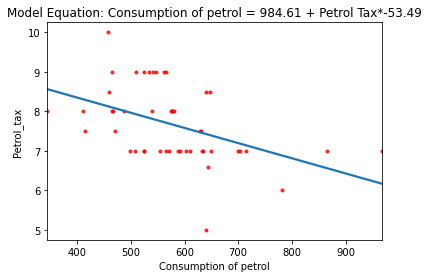

In [34]:
g = sns.regplot(df["Petrol_Consumption"], df["Petrol_tax"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Equation: Consumption of petrol = 984.61 + Petrol Tax*-53.49")
g.set_ylabel("Petrol_tax")
g.set_xlabel("Consumption of petrol")